In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
# from joblib import delayed, Parallel
# from tqdm import tqdm

# from sklearn.metrics import 
plt.rcParams['text.usetex'] = True


In [2]:


dfnum = pd.read_csv('numeric_data_agri.csv')
df_clean = dfnum.dropna(subset=['ckd_code_sample_1'])
X = df_clean.drop(columns=['ckd_code_sample_1', 'ckd__probable_sample_1', 'ckd_epi_sample_1'])
y = df_clean['ckd_code_sample_1']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

cdk_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'  
)
cdk_model.fit(X_train, y_train)

y_pred = cdk_model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       539
         1.0       0.90      0.87      0.88       122
         2.0       0.25      0.33      0.29         6

    accuracy                           0.96       667
   macro avg       0.71      0.73      0.72       667
weighted avg       0.96      0.96      0.96       667

[[531   8   0]
 [ 10 106   6]
 [  0   4   2]]


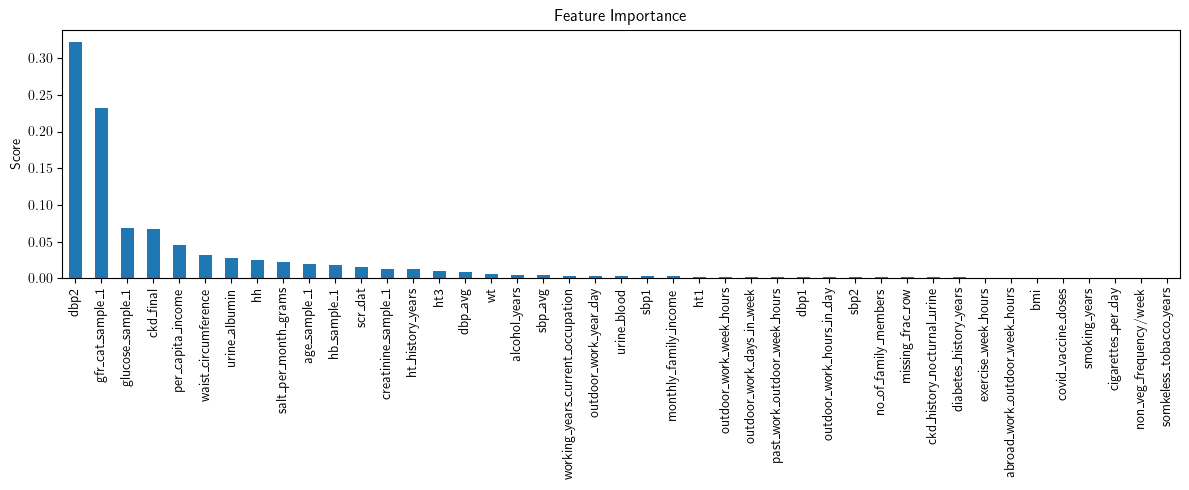

In [3]:

importances = pd.Series(cdk_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title("Feature Importance")
plt.ylabel("Score")
plt.tight_layout()
# plt.savefig('feature_importance_cdk_dtree.png', dpi=450)

plt.show()


c:\Users\aksha\.conda\envs\c138\Lib\site-packages\sklearn\metrics\_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


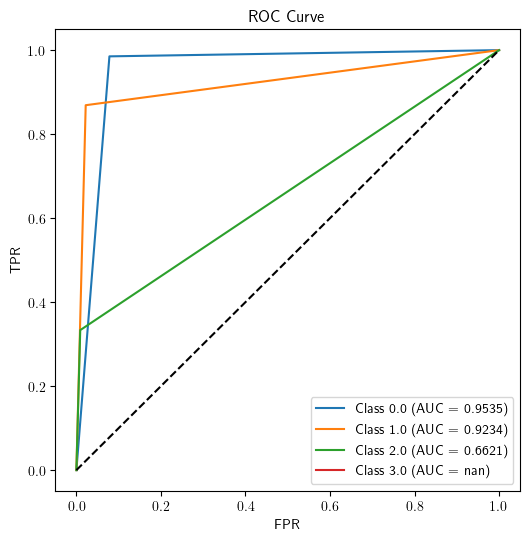

In [ ]:

y_proba = cdk_model.predict_proba(X_test)
classes = cdk_model.classes_

plt.figure(figsize=(6,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test == cls, y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
# plt.savefig('ROC_ckd_RF.png', dpi=450)
plt.show()


# ckd__probable_sample_1

In [5]:


dfnum = pd.read_csv('numeric_data_agri.csv')
df_clean = dfnum.dropna(subset=['ckd__probable_sample_1'])
X = df_clean.drop(columns=['ckd_code_sample_1', 'ckd__probable_sample_1', 'ckd_epi_sample_1'])
y = df_clean['ckd__probable_sample_1']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

cdk_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'  
)
cdk_model.fit(X_train, y_train)

y_pred = cdk_model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       523
         1.0       0.91      0.92      0.92       128

    accuracy                           0.97       651
   macro avg       0.95      0.95      0.95       651
weighted avg       0.97      0.97      0.97       651

[[512  11]
 [ 10 118]]


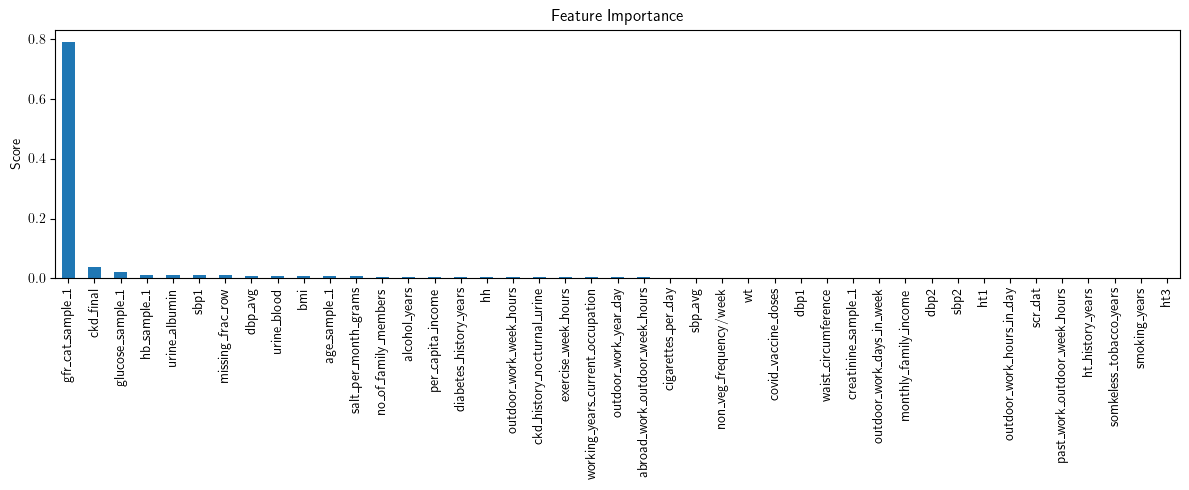

In [6]:

importances = pd.Series(cdk_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title("Feature Importance")
plt.ylabel("Score")
plt.tight_layout()
# plt.savefig('feature_importance_cdk_dtree.png', dpi=450)

plt.show()


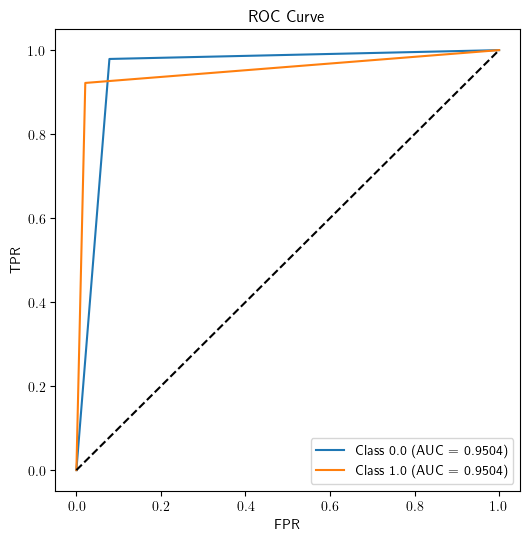

In [9]:

y_proba = cdk_model.predict_proba(X_test)
classes = cdk_model.classes_

plt.figure(figsize=(6,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test == cls, y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
# plt.savefig('ROC_ckd_RF.png', dpi=450)
plt.show()
